<h1>Projeto Final - Teoria dos Jogos</h1>

<h2>Preferência e utilidade: O que os consumidores procuram em um roupa da Zara?</h2>


------------------------------------------
Vídeo disponível em: TODO <br>
Link Google Colab: https://colab.research.google.com/drive/14_EdZmPmD2Pj2dO-C_bwHv1yQQujXzyy#scrollTo=uVOvXvwaGaSB<br>
GitHub: https://github.com/LarissaDG/Mestrado/<br>
Fonte Dataset: https://www.kaggle.com/datasets/xontoloyo/data-penjualan-zara/data


------------------------------------------


In [ ]:
#todo melhora o menu de navegação abaixo
#todo matriz de correlação variavies e teste de independencia
#Categorizar preço mineração frequente

#Índice:
1. [Introdução](#introdução)
   - a. [Dependências Externas](#de)
   - b. [Data Understanding](#du)
      - [Visualização de Dados](#dataviz1)
   - c. [Data Preparation](#dp)
2. [Metodologia](#metodologia)
   - 1. [Default Status](#default)
   - 2. [Preferências Lexicográficas](#pl)
   - 3. [Satisfying Procedure](#sp)


#**1. Introdução**
<a name="introdução"></a>
Baixando dependências externas, bibliotecas e subindo dados

## a) Dependências externas
<a name="de"></a>

In [ ]:
!pip install great_expectations
!pip install plotly
!pip install tensorflow==2.4.1
!pip install tf-keras-vis


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0)
ERROR: No matching distribution found for tensorflow==2.4.1


In [ ]:
#@title Bibliotecas

import os
import pandas as pd

import cv2

import great_expectations as ge

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.svm import NuSVR
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import FunctionTransformer

from mlxtend.frequent_patterns import apriori, association_rules

import statsmodels.api as sm
from statsmodels.formula.api import ols

import numpy as np

from scipy.optimize import minimize
from scipy.stats import chi2_contingency


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




In [ ]:
!great_expectations init

  and should_run_async(code)




  ___              _     ___                  _        _   _
 / __|_ _ ___ __ _| |_  | __|_ ___ __  ___ __| |_ __ _| |_(_)___ _ _  ___
| (_ | '_/ -_) _` |  _| | _|\ \ / '_ \/ -_) _|  _/ _` |  _| / _ \ ' \(_-<
 \___|_| \___\__,_|\__| |___/_\_\ .__/\___\__|\__\__,_|\__|_\___/_||_/__/
                                |_|
             ~ Always know what to expect from your data ~

Let's create a new Data Context to hold your project configuration.

Great Expectations will create a new directory with the following structure:

    great_expectations
    |-- great_expectations.yml
    |-- expectations
    |-- checkpoints
    |-- plugins
    |-- .gitignore
    |-- uncommitted
        |-- config_variables.yml
        |-- data_docs
        |-- validations

OK to proceed? [Y/n]: y


Congratulations! You are now ready to customize your Great Expectations configuration.

You can customize your configuration in many ways. Here are some examples:

  Use the CLI to:
    - Run `great_expectations datas

In [ ]:
# Inicializar um DataContext no Google Colab
context = ge.data_context.DataContext()

  and should_run_async(code)

  warnings.warn(



In [ ]:
#@title Carregando a base de dados
# Set up authentication
os.environ['GITHUB_AUTH'] = <TODO>

# Clone the repository (replace 'username/repo' with your repository)
!git clone <TODO>


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




fatal: destination path 'Mestrado' already exists and is not an empty directory.




---



## b) Data Understanding
<a name="du"></a>

O que significa cada uma das features do dataset


1. *Product ID:* Unique identifier for each product.
2. *Product Position:* The position of the product in the catalog or store layout.
3. *Promotion:* Indicator of whether the product is currently on promotion or not.
4. *Product Category:* The category of the product, such as clothing, accessories, shoes, etc.
5. *Seasonal:* Indicator of whether the product is part of a specific seasonal collection.
6. *Sales Volume:* The quantity of products sold.
7. *Brand:* Brand of the product.
8. *URL:* Product URL (e.g., if the product is sold online).
9. SKU: Stock Keeping Unit, a unique code used to identify items available for sale.
10. *Name:* Name of the product.
11. *Description:* Description of the product.
12. *Price:* Price of the product.
13. *Currency:* Currency of the product price.
14. *Scraped_at:* The time when the data was scraped (e.g., in web scraping process).
15. *Terms:* Terms or conditions of the product.
16. *Section:* Section or category where the product is sold in the store (e.g., women's clothing, men's clothing, children's clothing, etc.).

Total: 16 Features e 252 instâncias

**Observação**

* Aisle: Corredor
* End-cap: Ponta de gôndola
* Front of store: Frente da loja

In [ ]:
#@title Dataframe RAW
df_raw = pd.read_csv("/content/Mestrado/Dados/zara.csv", sep=';')
df_raw.head()


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [ ]:
summary = df_raw.info()
print(summary)
print()
print("Formato: ", df_raw.shape)

  and should_run_async(code)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

### Visualização de Dados
<a name="dataviz1"></a>


In [ ]:
# Calcular a proporção de cada entrada na coluna 'Product Position'
product_position_counts = df_raw['Product Position'].value_counts(normalize=True) * 100

# Criar o DataFrame para o plotly
df_plotly = pd.DataFrame({
    'Product Position': product_position_counts.index,
    'Proportion (%)': product_position_counts.values
})

# Criar o gráfico de barras com o plotly
fig = px.bar(df_plotly, x='Product Position', y='Proportion (%)',
             title='Proporção de Product Position',
             labels={'Product Position': 'Posição do Produto', 'Proportion (%)': 'Proporção (%)'},
             text='Proportion (%)')

# Atualizar o layout do gráfico
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, 100])
fig.show()


  and should_run_async(code)



In [ ]:
product_promotion_counts = df_raw['Promotion'].value_counts(normalize=True) * 100

# Criar o DataFrame para o plotly
df_plotly = pd.DataFrame({
    'Product Promotion': product_promotion_counts.index,
    'Proportion (%)': product_promotion_counts.values
})

# Criar o gráfico de barras com o plotly
fig = px.bar(df_plotly, x='Product Promotion', y='Proportion (%)',
             title='Proporção de Promotion',
             labels={'Product Promotion': 'Produto em Promoção', 'Proportion (%)': 'Proporção (%)'},
             text='Proportion (%)')

# Atualizar o layout do gráfico
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, 100])
fig.show()



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




In [ ]:
product_seasonal_counts = df_raw['Seasonal'].value_counts(normalize=True) * 100

# Criar o DataFrame para o plotly
df_plotly = pd.DataFrame({
    'Seasonal': product_seasonal_counts.index,
    'Proportion (%)': product_seasonal_counts.values
})

# Criar o gráfico de barras com o plotly
fig = px.bar(df_plotly, x='Seasonal', y='Proportion (%)',
             title='Proporção de Seasonal',
             labels={'Seasonal': 'Produto sazional', 'Proportion (%)': 'Proporção (%)'},
             text='Proportion (%)')

# Atualizar o layout do gráfico
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, 100])
fig.show()



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




In [ ]:
product_terms_counts = df_raw['terms'].value_counts(normalize=True) * 100

# Criar o DataFrame para o plotly
df_plotly = pd.DataFrame({
    'terms': product_terms_counts.index,
    'Proportion (%)': product_terms_counts.values
})

# Criar o gráfico de barras com o plotly
fig = px.bar(df_plotly, x='terms', y='Proportion (%)',
             title='Proporção de termos',
             labels={'terms': 'Lista de termos', 'Proportion (%)': 'Proporção (%)'},
             text='Proportion (%)')

# Atualizar o layout do gráfico
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, 100])
fig.show()



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




In [ ]:
# Criar o gráfico de pizza (gráfico de pizza 100%)
fig = px.pie(df_plotly, values='Proportion (%)', names='terms',
             title='Proporção de termos',
             labels={'terms': 'Lista de termos', 'Proportion (%)': 'Proporção (%)'})

fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1, 0.1, 0.1], hole=0.3)

fig.show()


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




In [ ]:
product_section_counts = df_raw['section'].value_counts(normalize=True) * 100

# Criar o DataFrame para o plotly
df_plotly = pd.DataFrame({
    'Product section': product_section_counts.index,
    'Proportion (%)': product_section_counts.values
})

# Criar o gráfico de barras com o plotly
fig = px.bar(df_plotly, x='Product section', y='Proportion (%)',
             title='Proporção de Product Section',
             labels={'Product section': 'Sessão do Produto', 'Proportion (%)': 'Proporção (%)'},
             text='Proportion (%)')

# Atualizar o layout do gráfico
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, 100])
fig.show()



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.






---



## c) Data Preparation
<a name="du"></a>

In [ ]:
#@title Validação de dados usando o Great Expectations
df_ge = ge.from_pandas(df_raw)

# Definir algumas expectativas
df_ge.expect_column_values_to_be_unique('Product ID')

df_ge.expect_column_values_to_be_in_set('Product Position', ['Aisle', 'End-cap','Front of Store'])

df_ge.expect_column_values_to_be_in_set('Product Category', ['Clothing'])

df_ge.expect_column_values_to_be_in_set('Promotion', ['Yes', 'No'])

df_ge.expect_column_values_to_be_in_set('Seasonal', ['Yes', 'No'])

df_ge.expect_column_values_to_be_between('Sales Volume', 0)

df_ge.expect_column_values_to_be_in_set('brand', ['Zara'])

df_ge.expect_column_values_to_be_unique('sku')

df_ge.expect_column_values_to_be_between('price', 0)

df_ge.expect_column_values_to_be_in_set('currency', ['USD'])

df_ge.expect_column_values_to_be_in_set('terms', ['jackets', 'sweaters', 't-shirts','shoes','jeans'])

df_ge.expect_column_values_to_be_in_set('section', ['WOMAN', 'MAN', 'CHILDREN'])

# Validar o DataFrame
results = df_ge.validate()

# Mostrar os resultados da validação
#print(results)

# Criar uma lista de dicionários com os dados que queremos
data = []
for result in results["results"]:
    row = {
        "success": result["success"],
        "expectation_type": result["expectation_config"]["expectation_type"],
        "column": result["expectation_config"]["kwargs"].get("column"),
        "value_set": result["expectation_config"]["kwargs"].get("value_set"),
        "element_count": result["result"]["element_count"],
        "partial_unexpected_list": result["result"]["partial_unexpected_list"]
    }
    data.append(row)

df_expectation = pd.DataFrame(data)

df_expectation


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,success,expectation_type,column,value_set,element_count,partial_unexpected_list
0,True,expect_column_values_to_be_unique,Product ID,None,252,[]
1,True,expect_column_values_to_be_in_set,Product Position,"[Aisle, End-cap, Front of Store]",252,[]
2,True,expect_column_values_to_be_in_set,Product Category,[Clothing],252,[]
3,True,expect_column_values_to_be_in_set,Promotion,"[Yes, No]",252,[]
4,True,expect_column_values_to_be_in_set,Seasonal,"[Yes, No]",252,[]
5,True,expect_column_values_to_be_between,Sales Volume,None,252,[]
6,True,expect_column_values_to_be_in_set,brand,[Zara],252,[]
7,False,expect_column_values_to_be_unique,sku,None,252,"[322612356-505-2, 311282631-712-2, 329282612-4..."
8,True,expect_column_values_to_be_between,price,None,252,[]
9,True,expect_column_values_to_be_in_set,currency,[USD],252,[]


In [ ]:
#@title Removendo colunas desnecessárias
col = ['Product Category','brand','url','sku','name','description','currency','scraped_at']
df_raw.drop(columns=col, inplace=True)
df_raw.head()


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,Product ID,Product Position,Promotion,Seasonal,Sales Volume,price,terms,section
0,185102,Aisle,No,No,2823,19.99,jackets,MAN
1,188771,Aisle,No,No,654,169.00,jackets,MAN
2,180176,End-cap,Yes,Yes,2220,129.00,jackets,MAN
3,112917,Aisle,Yes,Yes,1568,129.00,jackets,MAN
4,192936,End-cap,No,Yes,2942,139.00,jackets,MAN


In [ ]:
#@title Funções para modificar colunas
def ProductPosition (row):
    if row ['Product Position'] == 'Aisle':
        return 1
    if row ['Product Position'] == 'End-cap':
        return 2
    if row ['Product Position'] == 'Front of Store':
        return 3
    else:
        return int(row ['Product Position'])

def YorN (row, name):
    if row [name] == 'Yes':
        return 1
    if row [name] == 'No':
        return 2
    else:
        return int(row [name])

def section (row):
  if row ['section'] == 'WOMAN':
        return 1
  if row ['section'] == 'MAN':
        return 2
  if row ['section'] == 'CHILDREN':
        return 3
  else:
        return int(row ['section'])

def terms(row):
  if row ['terms'] == 'jackets':
        return 1
  if row ['terms'] == 'sweaters':
        return 2
  if row ['terms'] == 't-shirts':
        return 3
  if row ['terms'] == 'shoes':
        return 4
  if row ['terms'] == 'jeans':
        return 5
  else:
        return int(row ['terms'])

def apply_transformations(row):
    row['Product Position'] = ProductPosition(row)
    row['Promotion'] = YorN(row, 'Promotion')
    row['Seasonal'] = YorN(row, 'Seasonal')
    row['section'] = section(row)
    row['terms'] = terms(row)
    return row

df_raw = df_raw.apply(apply_transformations, axis=1)

print(df_raw.head())
#df_raw.info()

# Salvando o DataFrame atualizado
df_raw.to_csv('/content/Mestrado/Dados/zara_preprocessed.csv', index=False)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




   Product ID  Product Position  Promotion  Seasonal  Sales Volume   price  \
0      185102                 1          2         2          2823   19.99   
1      188771                 1          2         2           654  169.00   
2      180176                 2          1         1          2220  129.00   
3      112917                 1          1         1          1568  129.00   
4      192936                 2          2         1          2942  139.00   

   terms  section  
0      1        2  
1      1        2  
2      1        2  
3      1        2  
4      1        2  


Baixar imagens roupas

O script completo para fazer o download das imagens pode ser encontrado no Github. O site não favorece muito o processo, baixando mais imagens que o necessário e sobreescrevendo imagens com o mesmo nome. Portanto foi necessário uma verificação manual dos resultados. A base de dados limpa está disponível no GitHub e é usada a seguir.

Problemas:


*  Não conseguir acessar o site - não chega a criar a subpasta do id
*  Consegue acessar a página, mas é redirecionado para o menu de busca procurando pela palavra chave. **Provavelmente o produto referenciado acabou ou saiu de linha**
*  Baixa mais imagens que o devido.
*  Imagens de baixa qualidade (?)
*  Sobreescreve imagens com o mesmo nome


TODO: ver se eu consigo um modelo prétreinado para extrair atributos estéticos. -> Vou usar o Nima: vide site:
https://research.google/blog/introducing-nima-neural-image-assessment/

fica_a_dica https://github.com/amineHorseman/images-web-crawler



In [ ]:
#@title Baixar imagens
!unzip -q "/content/Mestrado/Dados/Imagens_oficial.zip"

#Variáveis Globais
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

# Definir o caminho da pasta principal
main_folder = '/content/Imagens_oficial'

# Listar as subpastas disponíveis (IDs)
available_ids = [int(subfolder) for subfolder in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, subfolder))]

# Filtrar os IDs na tabela original que não estão nas subpastas disponíveis
ids_in_table = df_raw['Product ID'].unique()
ids_to_keep = [id_prod for id_prod in ids_in_table if id_prod in available_ids]

# Criar novo DataFrame apenas com os IDs encontrados nas subpastas
df_only_ids = df_raw[df_raw['Product ID'].isin(ids_to_keep)]

# Salvar o DataFrame filtrado
#df.to_csv('/content/Mestrado/Dados/zara_features_img.csv', index=False)

# Verificar o número de linhas remanescentes
print(f"Número de linhas após filtragem: {len(df_only_ids)}")


# Carregar o modelo VGG16 pré-treinado
model = VGG16(weights='imagenet', include_top=False)
#base_model = VGG16(weights='imagenet')
#model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

# Função para redimensionar imagens
def resize_image(img_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    return img_array

# Função para carregar, preprocessar e extrair features
def load_and_preprocess_image(img_path):
    img_array = resize_image(img_path)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def extract_features(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    features = model.predict(img_array)
    features = features.flatten()
    return features

    # Função de teste para verificar o redimensionamento da imagem
def test_resize_image():
    # Caminho de uma imagem de teste
    test_img_path = '/content/Imagens_oficial/110075/04160752800-a1.jpg'

    # Redimensionar a imagem
    resized_img = resize_image(test_img_path)

    # Verificar se a imagem foi redimensionada corretamente
    assert resized_img.shape == (IMAGE_WIDTH, IMAGE_HEIGHT, 3), "Erro: O redimensionamento da imagem falhou"
    print("Teste bem-sucedido: A imagem foi redimensionada corretamente.")

# Executar o teste
print(test_resize_image())

# Função de teste para verificar a extração de features
def test_extract_features():
    # Caminho de uma imagem de teste
    test_img_path = '/content/Imagens_oficial/110075/04160752800-a1.jpg'

    # Extrair features da imagem de teste
    features = extract_features(test_img_path, model)

    # Verificar se as features foram extraídas corretamente
    assert features.shape == (7 * 7 * 512,), "Erro: A extração de features falhou"
    assert not np.all(features == 0), "Erro: Todas as features são zeros"
    print("Teste bem-sucedido: As features foram extraídas corretamente.")

# Executar o teste
print(test_extract_features())

# Definir o caminho da pasta principal
main_folder = '/content/Imagens_oficial'

# Criar uma lista para armazenar as features
all_features = []

# Iterar sobre cada subpasta
for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        # Verificar se o subfolder corresponde a um ID do dataset
        id_product = int(subfolder)
        if id_product in df_only_ids['Product ID'].values:
            # Iterar sobre cada imagem na subpasta
            for img_name in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, img_name)
                if os.path.isfile(img_path):
                    features = extract_features(img_path, model)
                    # Adicionar as features, o ID do produto e o nome do arquivo da imagem
                    all_features.append([id_product, img_name] + features.tolist())

# Converter a lista de features em DataFrame
features_df = pd.DataFrame(all_features)

# Adicionar nomes de colunas ao DataFrame de features
col_names = ['Product ID', 'image_name'] + [f'feature_{i}' for i in range(features_df.shape[1] - 2)]
features_df.columns = col_names

# Mesclar o DataFrame original com o DataFrame de features
df_features = df_only_ids.merge(features_df, on='Product ID', how='left')

#PCA Features
# Selecionar apenas as colunas de features
feature_columns = [col for col in df_features.columns if col.startswith('feature_')]
X = df_features[feature_columns].values

# Aplicar PCA para reduzir a dimensionalidade
pca = PCA(n_components=50)  # Reduzir para 50 componentes principais
X_pca = pca.fit_transform(X)

# Adicionar as componentes principais ao DataFrame original
pca_columns = [f'pca_{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

# Concatenar as componentes principais com o DataFrame original
df_all = pd.concat([df_features, df_pca], axis=1)

# Verificar o DataFrame resultante
print(df_all.info())

# Selecionar as colunas de features no DataFrame df_general
print("Colunas a serem removidas:", feature_columns)

# Remover as colunas de features do DataFrame df_general
df_all.drop(columns=feature_columns, inplace=True)

# Remover as colunas de features do DataFrame df_general
df_all.drop(columns='image_name', inplace=True)
print(df_all.head())

# Salvando o DataFrame atualizado
df_all.to_csv('/content/Mestrado/Dados/zara_features_img.csv', index=False)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Número de linhas após filtragem: 218
58889256/58889256 [==============================] - 1s 0us/step
Teste bem-sucedido: A imagem foi redimensionada corretamente.
None
1/1 [==============================] - 1s 1s/step
Teste bem-sucedido: As features foram extraídas corretamente.
None
1/1 [==============================] - 1s 1s/step
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Columns: 25147 entries, Product ID to pca_50
dtypes: float64(25139), int64(7), object(1)
memory usage: 373.2+ MB
None
Colunas a serem removidas: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'featu



---



## **RECUPERAÇÃO DE FALHAS**

Continuar daqui para não precisar refazer o pré-processamento acima
Basta ler o CSV. E continuar a modelagem

In [ ]:
#Dataframe RAW
df_raw = pd.read_csv("/content/Mestrado/Dados/zara.csv", sep=';')
df_pre =  pd.read_csv("/content/Mestrado/Dados/zara_preprocessed.csv", sep=',')
df_img = pd.read_csv("/content/Mestrado/Dados/zara_features_img.csv", sep=',')


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




#**2.Metodologia**
<a name="metodologi"></a>

##1. Análise de Default Status
<a name="default"></a>
* Dados Utilizados: Localização dos produtos na loja e volume de vendas.
* Método: Análise de gráficos e cálculo de estatísticas, como a probabilidade condicional, ANOVA e p-values

In [ ]:
# Gráfico de barras usando Plotly Express
title = 'Product Position vs. Sales Volume'
fig = px.box(df_raw, x='Product Position', y='Sales Volume', title=title)
fig.show()


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




In [ ]:
grouped_data = df_raw.groupby('Product Position')['Sales Volume'].sum().reset_index()

# Plotar o gráfico de barras usando Plotly Express
title = 'Product Position por soma cumulativa de Sales Volume'
fig = px.bar(grouped_data, x='Product Position', y='Sales Volume', title=title)

# Mostrar o gráfico
fig.show()


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




In [ ]:
# Calcular o número total de vendas
total_vendas = grouped_data['Sales Volume'].sum()

# Calcular a probabilidade condicional para cada posição
grouped_data['Probability (%)'] = (grouped_data['Sales Volume'] / total_vendas) * 100

# Arredondar para duas casas decimais
grouped_data['Probability (%)'] = grouped_data['Probability (%)'].round(2)
grouped_data


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,Product Position,Sales Volume,Probability (%)
0,Aisle,177396,38.60
1,End-cap,152930,33.28
2,Front of Store,129247,28.12


TODO - refinar
https://www.fm2s.com.br/blog/anova#:~:text=O%20que%20é%20Anova%3F,três%20ou%20mais%20grupos%20independentes.

In [ ]:
# Garanta que os nomes das colunas estejam sem espaços
df_raw.columns = df_raw.columns.str.replace(' ', '_')

# ANOVA
# Crie um modelo OLS para ANOVA
model_anova = ols('Sales_Volume ~ C(Product_Position)', data=df_raw).fit()
anova_table = sm.stats.anova_lm(model_anova, typ=2)

print("Resultados da ANOVA:")
print(anova_table)

# Regressão Linear
# Transformar a coluna 'Product_Position' em colunas binárias (dummy variables)
df_product_category = pd.get_dummies(df_raw['Product_Position']).astype(int)

# Concatenar as novas colunas ao dataframe original
df_combined = pd.concat([df_raw, df_product_category], axis=1)

X = df_combined[['Aisle','End-cap','Front of Store']]
X = sm.add_constant(X)
y = df_combined['Sales_Volume']

# Ajustar o modelo de regressão linear
model_regression = sm.OLS(y, X).fit()

print("\nResumo do Modelo de Regressão Linear:")
print(model_regression.summary())


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Resultados da ANOVA:
                           sum_sq     df         F    PR(>F)
C(Product_Position)  3.488437e+05    2.0  0.356473  0.700498
Residual             1.218356e+08  249.0       NaN       NaN

Resumo do Modelo de Regressão Linear:
                            OLS Regression Results                            
Dep. Variable:           Sales_Volume   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.3565
Date:                Sun, 30 Jun 2024   Prob (F-statistic):              0.700
Time:                        14:03:16   Log-Likelihood:                -2006.8
No. Observations:                 252   AIC:                             4020.
Df Residuals:                     249   BIC:                             4030.
Df Model:                           2                                         
Covariance Type:            nonrobust         



---



##2. Preferências Lexicográficas
<a name="pl"></a>
* Procedimento: Realizar pesquisas com consumidores ou aplicar o método Analytic Hierarchy Process (AHP) para determinar a ordem de prioridade dos atributos dos produtos.
* Para a construção da Pairwise Matrix, faço um modelo de regressão e a partir da contribuição das variáveis para o modelo construo a matriz

In [ ]:
#@title Variaveis globais
model_classes = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, NuSVR]
models = ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'NuSVR']

# Lista de opções de op
opcoes = [1, 2]


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




In [ ]:
#@title Divisão em Treino, Validação e Teste
# Passo 1: Agrupar por 'Product ID' e criar uma lista única de IDs
product_ids = df_img['Product ID'].unique()

# Passo 2: Dividir os IDs em treino (60%), teste (20%) e validação (20%)
train_ids, temp_ids = train_test_split(product_ids, test_size=0.4, random_state=42, shuffle=False)
test_ids, val_ids = train_test_split(temp_ids, test_size=0.5, random_state=42, shuffle=False)

# Passo 3: Criar os DataFrames de treino, teste e validação com base nos IDs
X_train = df_img[df_img['Product ID'].isin(train_ids)].drop(columns='Sales Volume')
y_train = df_img[df_img['Product ID'].isin(train_ids)]['Sales Volume']

X_test = df_img[df_img['Product ID'].isin(test_ids)].drop(columns='Sales Volume')
y_test = df_img[df_img['Product ID'].isin(test_ids)]['Sales Volume']

X_val = df_img[df_img['Product ID'].isin(val_ids)].drop(columns='Sales Volume')
y_val = df_img[df_img['Product ID'].isin(val_ids)]['Sales Volume']

# Verificando as proporções
print("Tamanho do conjunto de treino:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test))
print("Tamanho do conjunto de validação:", len(X_val))


print(X_train)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Tamanho do conjunto de treino: 1205
Tamanho do conjunto de teste: 340
Tamanho do conjunto de validação: 400
      Product ID  Product Position  Promotion  Seasonal  price  terms  \
0         185102                 1          2         2  19.99      1   
1         185102                 1          2         2  19.99      1   
2         185102                 1          2         2  19.99      1   
3         185102                 1          2         2  19.99      1   
4         185102                 1          2         2  19.99      1   
...          ...               ...        ...       ...    ...    ...   
1200      186638                 2          1         2  59.90      4   
1201      186638                 2          1         2  59.90      4   
1202      186638                 2          1         2  59.90      4   
1203      186638                 2          1         2  59.90      4   
1204      186638                 2          1         2  59.90      4   

      section  

In [ ]:
X_train = X_train.drop(columns='Product ID')
#y_train

X_test = X_test.drop(columns='Product ID')
#y_test

X_val = X_val.drop(columns='Product ID')
#y_val



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




In [ ]:
#title Funções para modelagem
def escolherParametros(op):
    if op == 1:
        #Usa todos os atributos
        attr_use= ['price']
        return attr_use
    if op == 2:
        #Usa os 4C's
        attr_use=  ['Product Position', 'Promotion', 'Seasonal', 'price',
       'terms', 'section', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5',
       'pca_6', 'pca_7', 'pca_8', 'pca_9', 'pca_10', 'pca_11', 'pca_12',
       'pca_13', 'pca_14', 'pca_15', 'pca_16', 'pca_17', 'pca_18', 'pca_19',
       'pca_20', 'pca_21', 'pca_22', 'pca_23', 'pca_24', 'pca_25', 'pca_26',
       'pca_27', 'pca_28', 'pca_29', 'pca_30', 'pca_31', 'pca_32', 'pca_33',
       'pca_34', 'pca_35', 'pca_36', 'pca_37', 'pca_38', 'pca_39', 'pca_40',
       'pca_41', 'pca_42', 'pca_43', 'pca_44', 'pca_45', 'pca_46', 'pca_47',
       'pca_48', 'pca_49', 'pca_50']
        return attr_use

class mudaDados(BaseEstimator, TransformerMixin):
    def __init__(self,op=1):
        self.op = op
    def fit (self,X=None,y=None):
        return self
    def transform(self,X):
        #print(self.op)
        return X[escolherParametros(self.op)]

def get_model(modelo_procurado):
  try:
      indice = models.index(modelo_procurado)
      return model_classes[indice]
  except ValueError:
      return -1

def get_model_param(model,best_params):
    op_param = best_params['dados__op']

    if model == 'LinearRegression':
      return op_param, None

    elif model == 'DecisionTreeRegressor':
      param = best_params['regressor__max_depth']
      return op_param, param

    elif model == 'RandomForestRegressor':
      param = best_params['regressor__n_estimators']
      return op_param, param

    elif model == 'GradientBoostingRegressor':
      param = best_params['regressor__n_estimators']
      return op_param, param

    else: #NuSVR
      param = best_params['regressor__kernel']
      return op_param, param

def set_model_param(Best_Models):
    model = get_model(Best_Models['modelo'])
    op_param = {'op':Best_Models['op_param']}

    if Best_Models['modelo'] == 'LinearRegression':
      return op_param, None, model

    elif Best_Models['modelo']== 'DecisionTreeRegressor':
      param = {'max_depth': Best_Models['param']}

    elif Best_Models['modelo'] == 'RandomForestRegressor':
      param = {'n_estimators': Best_Models['param']}

    elif Best_Models['modelo'] == 'GradientBoostingRegressor':
      param = {'n_estimators': Best_Models['param']}

    else: #NuSVR
      param = {'kernel': Best_Models['param']}
    return op_param, param, model

# Função para treinar e avaliar o modelo
def train_and_evaluate_model(model, op, param, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    test_error = mean_squared_error(y_val, y_pred, squared=False)  # RMSE
    return model, y_pred, test_error



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




In [ ]:
pipelines = [
    Pipeline([
        ('dados',mudaDados()),
        ('scaler',MinMaxScaler()),
        ('regressor',LinearRegression())
    ]),
    Pipeline([
        ('dados',mudaDados()),
        ('scaler',MinMaxScaler()),
        ('regressor',DecisionTreeRegressor())
    ]),
    Pipeline([
        ('dados',mudaDados()),
        ('scaler',MinMaxScaler()),
        ('regressor',RandomForestRegressor())
    ]),
    Pipeline([
        ('dados',mudaDados()),
        ('scaler',MinMaxScaler()),
        ('regressor',GradientBoostingRegressor())
    ]),
    Pipeline([
        ('dados',mudaDados()),
        ('scaler',MinMaxScaler()),
        ('regressor',NuSVR())
    ]),

]


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




In [ ]:
tuning_params = [
    {'dados__op':range(1,3)},#'dados__op':range(1,3)
    {'dados__op':range(1,3),'regressor__max_depth': range(1,100,5)},
    {'dados__op':range(1,3),'regressor__n_estimators': range(1,100,5)},
    {'dados__op':range(1,3),'regressor__n_estimators': range(1,100,5)},
    {'dados__op':range(1,3),'regressor__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
]


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




In [ ]:
results = []

for i in range(0,5):
  gs = GridSearchCV(pipelines[i],tuning_params[i],scoring='neg_root_mean_squared_error',cv=5,return_train_score = True,verbose = 3)
  gs.fit(X_train,y_train)

  #Pega os dados
  best_index = np.argmax(gs.cv_results_['mean_test_score'])
  best_params = gs.best_params_
  mean_train_score = -gs.cv_results_['mean_train_score'][best_index]
  std_train_score = gs.cv_results_['std_train_score'][best_index]
  mean_test_score = -gs.cv_results_['mean_test_score'][best_index]
  std_test_score = gs.cv_results_['std_test_score'][best_index]

  #processa
  op_param, param = get_model_param(models[i],best_params)
  #print('colunas usadas:', X_train.columns)

  results.append({
      'modelo': models[i],
      'mean_train_score': mean_train_score,
      'std_train_score': std_train_score,
      'mean_test_score': mean_test_score,
      'std_test_score': std_test_score,
      'op_param': op_param,
      'param': param
  })

  all_results = gs.cv_results_
  #print("OUTPUT:")
  #print(all_results)

  #print("Treat param", treat_param(all_results))


df_results = pd.DataFrame(results)

# Salvando o DataFrame atualizado
df_results.to_csv('/content/Mestrado/Dados/Best_Models.csv', index=False)
df_results


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END dados__op=1;, score=(train=-646.361, test=-719.865) total time=   0.0s
[CV 2/5] END dados__op=1;, score=(train=-629.776, test=-728.517) total time=   0.0s
[CV 3/5] END dados__op=1;, score=(train=-647.149, test=-667.127) total time=   0.0s
[CV 4/5] END dados__op=1;, score=(train=-630.488, test=-722.558) total time=   0.0s
[CV 5/5] END dados__op=1;, score=(train=-680.910, test=-505.248) total time=   0.0s
[CV 1/5] END dados__op=2;, score=(train=-604.760, test=-757.810) total time=   0.1s
[CV 2/5] END dados__op=2;, score=(train=-593.309, test=-760.897) total time=   0.1s
[CV 3/5] END dados__op=2;, score=(train=-610.952, test=-699.194) total time=   0.1s
[CV 4/5] END dados__op=2;, score=(train=-596.636, test=-749.030) total time=   0.0s
[CV 5/5] END dados__op=2;, score=(train=-641.316, test=-23280440486026256.000) total time=   0.1s
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END dados__op=1

,modelo,mean_train_score,std_train_score,mean_test_score,std_test_score,op_param,param
0,LinearRegression,646.936918,18.545180,668.662951,84.635340,1,None
1,DecisionTreeRegressor,639.525009,20.756827,715.201681,118.885095,1,1
2,RandomForestRegressor,229.431755,24.479490,742.438105,122.186600,2,56
3,GradientBoostingRegressor,647.259591,18.954296,658.983417,78.208723,1,1
4,NuSVR,653.163924,17.184905,654.358358,73.448846,1,sigmoid


## **RECUPERAÇÃO DE FALHAS**

Continuar daqui para não precisar refazer o pré-processamento acima
Basta ler o CSV. E continuar a modelagem

In [ ]:
#Ler arquivo em caso de erro
Best_Models = pd.read_csv(r'/content/Mestrado/Dados/Best_Models.csv', sep = ',', header = 'infer',encoding='utf-8',low_memory=False)

#Ordena
Best_Models = Best_Models.sort_values(["mean_test_score","std_test_score"])
Best_Models


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,modelo,mean_train_score,std_train_score,mean_test_score,std_test_score,op_param,param
4,NuSVR,653.163924,17.184905,654.358358,73.448846,1,sigmoid
3,GradientBoostingRegressor,647.259591,18.954296,658.983417,78.208723,1,1
0,LinearRegression,646.936918,18.545180,668.662951,84.635340,1,NaN
1,DecisionTreeRegressor,639.525009,20.756827,715.201681,118.885095,1,1
2,RandomForestRegressor,229.431755,24.479490,742.438105,122.186600,2,56


In [ ]:
#Melhor modelo:
try:
  best_model_op1 = df_results[df_results['op_param'] == 1].sort_values(by='mean_test_score').iloc[0]
except IndexError as i:
    print(f"Erro: {i}")
    print(f"Op_param 1 não disponivel")
    raise

try:
  best_model_op2 = df_results[df_results['op_param'] == 2].sort_values(by='mean_test_score').iloc[0]
except IndexError as i:
    print(f"Erro: {i}")
    print(f"Op_param 1 não disponivel")
    raise

# Verificar os modelos e seus parâmetros
print(best_model_op1)
print(best_model_op2)



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




modelo                   NuSVR
mean_train_score    653.163924
std_train_score      17.184905
mean_test_score     654.358358
std_test_score       73.448846
op_param                     1
param                  sigmoid
Name: 4, dtype: object
modelo              RandomForestRegressor
mean_train_score               229.431755
std_train_score                  24.47949
mean_test_score                742.438105
std_test_score                   122.1866
op_param                                2
param                                  56
Name: 2, dtype: object


In [ ]:
# Treinamento do melhor modelo para op=1
op1, param1, model1 = set_model_param(best_model_op1)
model_op1, test_prev_op1, test_error_op1 = train_and_evaluate_model(model1(), op1, param1, X_train, y_train, X_val, y_val)

# Imprimir o RMSE negativo
print(f'RMSE negativo: {-test_error_op1}')

# Treinamento do melhor modelo para op=2
op2, param2, model2 = set_model_param(best_model_op2)
model_op2, test_prev_op2, test_error_op2 = train_and_evaluate_model(model2(), op2, param2, X_train, y_train, X_val, y_val)

# Imprimir o RMSE negativo
print(f'RMSE negativo: {-test_error_op2}')


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




RMSE negativo: -718.3262435901344
RMSE negativo: -727.9426394457533



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




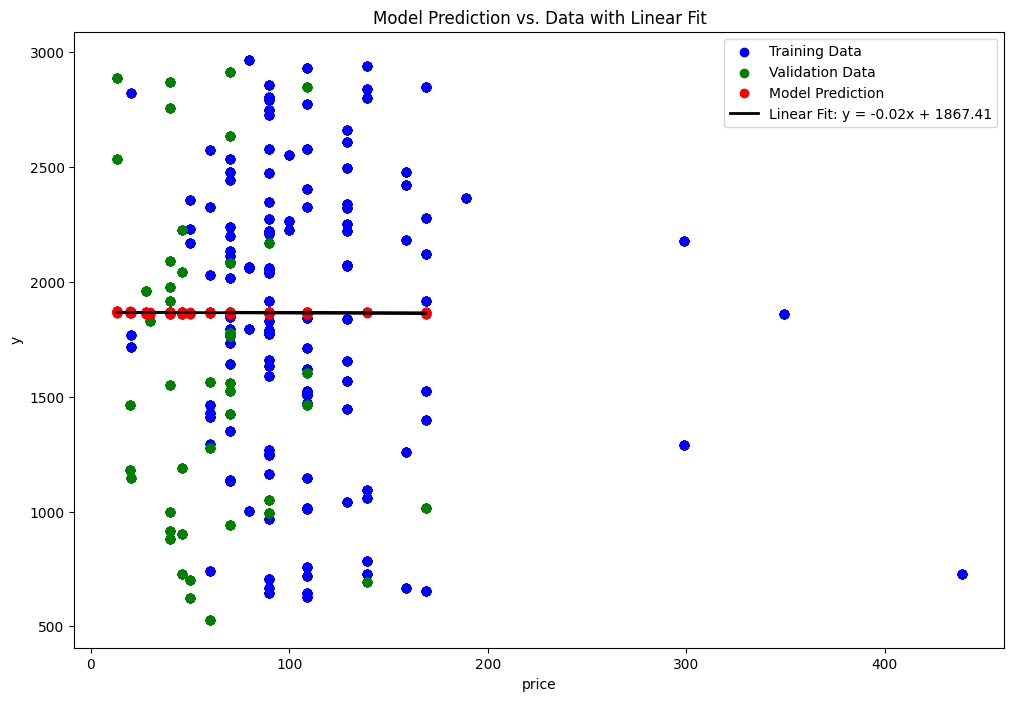

Equação da função linear ajustada: y = -0.02x + 1867.41


In [ ]:
# Treinamento do modelo de regressão linear usando as previsões do melhor modelo para op=2
regression = LinearRegression()
regression.fit(X_val[['price']], test_prev_op1)

# Plotando os dados e a linha de regressão
plt.figure(figsize=(12, 8))
plt.scatter(X_train['price'], y_train, color='blue', label='Training Data')
plt.scatter(X_val['price'], y_val, color='green', label='Validation Data')
plt.scatter(X_val['price'], test_prev_op1, color='red', label='Model Prediction')
plt.plot(X_val['price'], regression.predict(X_val[['price']]), color='black', linewidth=2, label=f'Linear Fit: y = {regression.coef_[0]:.2f}x + {regression.intercept_:.2f}')
plt.title('Model Prediction vs. Data with Linear Fit')
plt.xlabel('price')
plt.ylabel('y')
plt.legend()
plt.show()

# Imprimir a equação da função linear ajustada
print(f'Equação da função linear ajustada: y = {regression.coef_[0]:.2f}x + {regression.intercept_:.2f}')


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




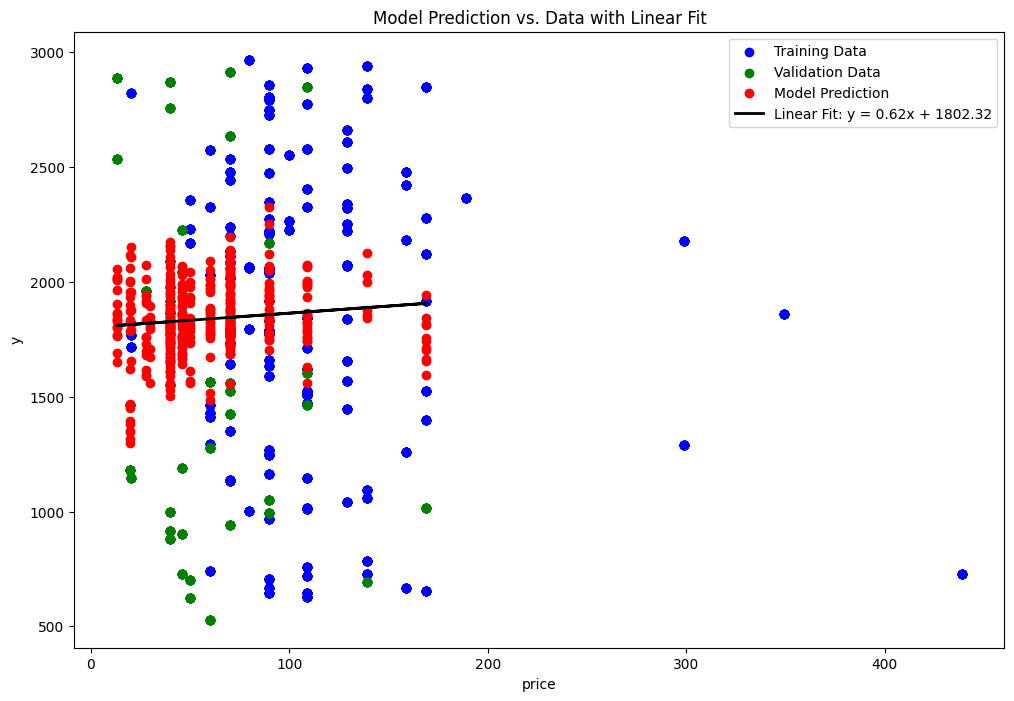

Equação da função linear ajustada: y = 0.62x + 1802.32


In [ ]:
# Treinamento do modelo de regressão linear usando as previsões do melhor modelo para op=2
regression = LinearRegression()
regression.fit(X_val[['price']], test_prev_op2)

# Plotando os dados e a linha de regressão
plt.figure(figsize=(12, 8))
plt.scatter(X_train['price'], y_train, color='blue', label='Training Data')
plt.scatter(X_val['price'], y_val, color='green', label='Validation Data')
plt.scatter(X_val['price'], test_prev_op2, color='red', label='Model Prediction')
plt.plot(X_val['price'], regression.predict(X_val[['price']]), color='black', linewidth=2, label=f'Linear Fit: y = {regression.coef_[0]:.2f}x + {regression.intercept_:.2f}')
plt.title('Model Prediction vs. Data with Linear Fit')
plt.xlabel('price')
plt.ylabel('y')
plt.legend()
plt.show()

# Imprimir a equação da função linear ajustada
print(f'Equação da função linear ajustada: y = {regression.coef_[0]:.2f}x + {regression.intercept_:.2f}')

Preciso construir minha matriz Pairwise

A Comparação Pairwise (ou comparação par-a-par) no AHP é um método para avaliar a importância relativa de um conjunto de critérios. A ideia é comparar cada par de critérios e determinar qual deles é mais importante e em que grau.

A análise de regressão pode ser usada para entender a relação entre os critérios e a variável dependente (neste caso, a atratividade das compras, que pode ser aproximada pelo volume de vendas).

Use "Sales Volume" como a variável dependente.

Ideias:


*   PCA - . Isso é útil para entender quanto de informação cada componente principal captura dos dados originais.
*   coeficientes dos modelos:

```
from sklearn.ensemble import RandomForestRegressor

# Treinar o modelo
model = RandomForestRegressor()
model.fit(X, y)

# Importância das features
importances = model.feature_importances_
print(importances)

```
*   SelectKBest: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest.fit

* permutation_importance: https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html



```
perm_importance = permutation_importance(model_op1, X_val, y_val, n_repeats=10, random_state=42)
importances = perm_importance.importances_mean
contribuicoes_linear = pd.DataFrame({'Variável': X_val.columns, 'Contribuição': importances})
contribuicoes_linear['Contribuição Absoluta'] = np.abs(contribuicoes_linear['Contribuição'])
contribuicoes_linear = contribuicoes_linear.sort_values(by='Contribuição Absoluta', ascending=False).reset_index(drop=True)
top_features = contribuicoes_linear.head(5)['Variável'].values

print(contribuicoes_linear.head(5))

regression = LinearRegression()
regression.fit(X_val[top_features], test_prev_op1)
contribuicoes_linear_final = pd.DataFrame({'Variável': top_features, 'Contribuição': regression.coef_})
contribuicoes_linear_final
```



* https://stackoverflow.com/questions/65439843/linear-regression-get-feature-importance-using-minmaxscaler-extremely-larg

```
import pandas as pd
import statsmodels.api as sm

# Dados fictícios para ilustração
data = {
    'Preco': [19.99, 169.00],
    'Promocao': [0, 0],
    'Sazonalidade': [0, 0],
    'Posicao': [1, 1],
    'SalesVolume': [2823, 654]
}
df = pd.DataFrame(data)

# Adicionar uma constante ao modelo (intercepto)
X = df[['Preco', 'Promocao', 'Sazonalidade', 'Posicao']]
X = sm.add_constant(X)
y = df['SalesVolume']

# Treinar o modelo
model = sm.OLS(y, X).fit()
print(model.summary())

```






In [ ]:
#TODO melhorar o procedimento abaixo de regressão

In [ ]:
# Adicionar uma constante ao modelo (intercepto)
X = X_train[['Product Position', 'Promotion', 'Seasonal', 'price', 'terms',
       'section', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6',
       'pca_7', 'pca_8', 'pca_9', 'pca_10', 'pca_11', 'pca_12', 'pca_13',
       'pca_14', 'pca_15', 'pca_16', 'pca_17', 'pca_18', 'pca_19', 'pca_20',
       'pca_21', 'pca_22', 'pca_23', 'pca_24', 'pca_25', 'pca_26', 'pca_27',
       'pca_28', 'pca_29', 'pca_30', 'pca_31', 'pca_32', 'pca_33', 'pca_34',
       'pca_35', 'pca_36', 'pca_37', 'pca_38', 'pca_39', 'pca_40', 'pca_41',
       'pca_42', 'pca_43', 'pca_44', 'pca_45', 'pca_46', 'pca_47', 'pca_48',
       'pca_49', 'pca_50']]
X = sm.add_constant(X)
y = y_train

# Treinar o modelo
model = sm.OLS(y, X).fit()
print(model.summary())
var_summary = model.summary()


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




                            OLS Regression Results                            
Dep. Variable:           Sales Volume   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     2.382
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           1.31e-07
Time:                        13:21:44   Log-Likelihood:                -9455.7
No. Observations:                1205   AIC:                         1.902e+04
Df Residuals:                    1149   BIC:                         1.931e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Product Position   -15.1915     23.329  

In [ ]:
# Extrair os valores p para cada coeficiente
p_values = var_summary.tables[1]
p_values_df = pd.DataFrame(p_values.data)

# Agora, para usar a primeira linha como nomes de colunas, você pode redefinir os cabeçalhos assim:
p_values_df.columns = p_values_df.iloc[0]
p_values_df = p_values_df[1:]

p_values_df


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,,coef,std err,t,P>|t|,[0.025,0.975]
1,Product Position,-15.1915,23.329,-0.651,0.515,-60.964,30.581
2,Promotion,44.7885,38.657,1.159,0.247,-31.057,120.634
3,Seasonal,-57.8712,37.691,-1.535,0.125,-131.823,16.080
4,price,-1.6596,0.377,-4.397,0.000,-2.400,-0.919
5,terms,40.0100,63.063,0.634,0.526,-83.722,163.742
6,section,1006.1698,67.217,14.969,0.000,874.287,1138.052
7,pca_1,0.0150,0.081,0.184,0.854,-0.145,0.175
8,pca_2,0.1113,0.093,1.200,0.230,-0.071,0.293
9,pca_3,-0.1531,0.093,-1.649,0.099,-0.335,0.029
10,pca_4,0.2410,0.179,1.347,0.178,-0.110,0.592


Em um modelo de regressão linear, o valor p associado a cada coeficiente estimado (como os coeficientes de 'Preco', 'Promocao', etc.) indica a probabilidade de que o coeficiente estimado seja zero, dado os dados amostrais.<br>
Um valor p pequeno (< 0.05) indica que é improvável que o coeficiente seja zero; portanto, o preditor (variável independente) é considerado estatisticamente significativo para explicar a variabilidade na variável dependente.<br>
Um valor p grande (> 0.05) sugere que não há evidência suficiente para rejeitar a hipótese nula de que o coeficiente é zero, indicando que o preditor pode não ser significativo no modelo.<br>



---



## Analytic Hierarchy Process (AHP)
1. Passo 1: Definição do Objetivo
* Objetivo: Selecionar o produto mais atraente para compra.
2. Passo 2: Estrutura da Hierarquia
* Critérios:
 - Preço
 - Promoção
 - Sazonalidade
 - Posição do Produto
 - (Possivelmente características extraídas pelo VGG16)
* Alternativas: Produtos no dataset.
3. Passo 3: Comparações Pairwise
* Realize comparações pairwise para determinar a importância relativa dos critérios.
4. Passo 4: Cálculo dos Pesos
5. Passo 5: Avaliação das Alternativas
* Avalie cada produto em relação a cada critério. Isso pode envolver normalizar os valores dos critérios, como o preço, ou usar métodos qualitativos para critérios como "Promoção" e "Sazonalidade".
6. Passo 6: Cálculo da Pontuação Final
* Multiplique as avaliações normalizadas das alternativas pelos pesos dos critérios e some os resultados para obter a pontuação final de cada produto.
7. Passo 7: Gráfico de Pareto
* Crie um gráfico de Pareto para visualizar a dominância dos produtos. Os passos são:

* Classificação dos Produtos: Ordene os produtos com base nas pontuações finais do AHP.
* Cálculo Acumulativo: Calcule a contribuição acumulativa de cada produto para a atratividade total.
* Gráfico: Plote as contribuições acumulativas no eixo Y e os produtos no eixo X.
---



Verificação de Consistência
O AHP inclui uma verificação de consistência para garantir que as comparações não sejam arbitrárias:

**Calcule o vetor de prioridade (pesos) multiplicando a matriz original pelos pesos normalizados.
Consistência: Divida cada elemento do vetor resultante pelos pesos individuais.
Calculando o Índice de Consistência (CI):
𝐶
𝐼
=
𝜆
max
⁡
−
𝑛
𝑛
−
1
CI=
n−1
λ
max
​
 −n
​

onde
𝜆
max
⁡
λ
max
​
  é a média dos valores obtidos na verificação de consistência e
𝑛
n é o número de critérios.
Razão de Consistência (CR):
𝐶
𝑅
=
𝐶
𝐼
𝑅
𝐼
CR=
RI
CI
​

onde RI é o Índice de Consistência Aleatório. Um CR menor que 0.1 indica uma matriz de comparação consistente.

Em um processo de tomada de decisão usando o Analytic Hierarchy Process (AHP), os **critérios** e as **alternativas** têm funções distintas:

### Critérios
Os critérios são os atributos ou fatores que você usa para avaliar as alternativas. No seu caso, os critérios são os aspectos que influenciam a atratividade de um produto para o consumidor. Por exemplo:

- **Preço**: O custo do produto.
- **Promoção**: Se o produto está em promoção ou não.
- **Sazonalidade**: Se o produto é sazonal ou não.
- **Posição do Produto (Vitrine)**: Onde o produto está localizado na loja.
- **Características Extraídas pelo VGG16**: Características visuais do produto extraídas por uma rede neural (caso você tenha essas características).

### Alternativas
As alternativas são as diferentes opções que você está avaliando, neste caso, os produtos disponíveis. Cada produto no seu dataset é uma alternativa. Por exemplo:

- Produto 0: BASIC PUFFER JACKET
- Produto 1: TUXEDO JACKET

### Passo a Passo para AHP

1. **Defina o Objetivo**: Selecionar o produto mais atraente para compra.
2. **Estruture a Hierarquia**:
   - **Nível 1**: Objetivo.
   - **Nível 2**: Critérios (Preço, Promoção, Sazonalidade, Posição do Produto, etc.).
   - **Nível 3**: Alternativas (Produto 0, Produto 1, etc.).
3. **Comparação Pairwise dos Critérios**: Avalie a importância relativa dos critérios em relação ao objetivo.
4. **Determinação dos Pesos dos Critérios**: Calcule os pesos baseados nas comparações pairwise.
5. **Avaliação das Alternativas**: Avalie cada produto em relação a cada critério.
6. **Cálculo da Pontuação Final**: Multiplique as avaliações normalizadas pelos pesos dos critérios e some os resultados para obter a pontuação final de cada produto.
7. **Visualização com Gráfico de Pareto**: Classifique os produtos com base nas pontuações finais e crie um gráfico de Pareto para visualizar a dominância dos produtos.

### Exemplo Prático

#### Critérios e Pesos
Suponha que você tenha definido os seguintes pesos após a comparação pairwise:

- **Preço**: 0.4
- **Promoção**: 0.3
- **Sazonalidade**: 0.2
- **Posição do Produto (Vitrine)**: 0.1

#### Avaliação das Alternativas
Para os produtos:

- Produto 0:
  - Preço: 19.99 (normalizado: 1 / 19.99 ≈ 0.05)
  - Promoção: Não (0)
  - Sazonalidade: Não (0)
  - Posição do Produto: Aisle (1)

- Produto 1:
  - Preço: 169.00 (normalizado: 1 / 169.00 ≈ 0.0059)
  - Promoção: Não (0)
  - Sazonalidade: Não (0)
  - Posição do Produto: Aisle (1)

#### Pontuações Finais
- Produto 0: (0.05 * 0.4) + (0 * 0.3) + (0 * 0.2) + (1 * 0.1) ≈ 0.12
- Produto 1: (0.0059 * 0.4) + (0 * 0.3) + (0 * 0.2) + (1 * 0.1) ≈ 0.102

#### Gráfico de Pareto
Classifique os produtos pela pontuação final e crie o gráfico de Pareto para mostrar a dominância.

```python
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo de dados
data = {
    'Produto': ['Produto 0', 'Produto 1'],
    'Pontuacao': [0.12, 0.102]
}

df = pd.DataFrame(data)
df = df.sort_values(by='Pontuacao', ascending=False)
df['Cumulative'] = df['Pontuacao'].cumsum()

# Gráfico de Pareto
fig, ax = plt.subplots()
ax.bar(df['Produto'], df['Pontuacao'], color='blue')
ax2 = ax.twinx()
ax2.plot(df['Produto'], df['Cumulative'], color='red', marker='o', linestyle='-')
ax2.yaxis.set_major_formatter(plt.PercentFormatter(1))

ax.set_xlabel('Produto')
ax.set_ylabel('Pontuação')
ax2.set_ylabel('Cumulative')

plt.title('Gráfico de Pareto dos Produtos')
plt.show()
```

Seguindo esses passos, você pode usar o AHP para determinar o produto mais atraente para compra e visualizar essa informação de forma clara com um gráfico de Pareto.



---



In [ ]:
p_values_df['P>|t|'] = p_values_df['P>|t|'].astype(float)
p_values_df.head(5)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,,coef,std err,t,P>|t|,[0.025,0.975]
1,Product Position,-15.1915,23.329,-0.651,0.515,-60.964,30.581
2,Promotion,44.7885,38.657,1.159,0.247,-31.057,120.634
3,Seasonal,-57.8712,37.691,-1.535,0.125,-131.823,16.080
4,price,-1.6596,0.377,-4.397,0.000,-2.400,-0.919
5,terms,40.0100,63.063,0.634,0.526,-83.722,163.742


In [ ]:
#Passo 2: Estrutura da Hierarquia Critérios:
p_values_filtered = p_values_df[p_values_df['P>|t|'] < 0.05]
print(p_values_filtered)

criteria = p_values_filtered.iloc[:, 0].tolist()
print(criteria)

contributions = p_values_filtered['P>|t|'].to_numpy()
print(contributions)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




0                  coef    std err          t  P>|t|     [0.025     0.975]
4     price     -1.6596      0.377     -4.397  0.000     -2.400     -0.919
6   section   1006.1698     67.217     14.969  0.000    874.287   1138.052
15    pca_9     -0.5673      0.225     -2.520  0.012     -1.009     -0.126
27   pca_21      0.7392      0.305      2.423  0.016      0.141      1.338
28   pca_22      0.7604      0.291      2.610  0.009      0.189      1.332
35   pca_29      0.8325      0.324      2.570  0.010      0.197      1.468
39   pca_33      0.8612      0.337      2.556  0.011      0.200      1.522
53   pca_47      0.8672      0.386      2.246  0.025      0.110      1.625
['price', 'section', 'pca_9', 'pca_21', 'pca_22', 'pca_29', 'pca_33', 'pca_47']
[0.    0.    0.012 0.016 0.009 0.01  0.011 0.025]


In [ ]:
#Passo 3: Cria matriz comparações Pairwise
#Realize comparações pairwise para determinar a importância relativa dos critérios.

#p-values varia entre 0 e 1. Subtraio 1 de tudo para 'inverter' o que é mais próximo de 0 é o mais importante.
contributions = 1 - contributions
print(contributions)
abs_contributions = np.abs(contributions)

# Normalização dos pesos
weights = abs_contributions / np.sum(abs_contributions)
weights = weights * np.sign(contributions)  # Ajustar os sinais

# Inicializar a matriz pairwise
pairwise_matrix = np.zeros((len(criteria), len(criteria)))

# Preencher a matriz pairwise
for i in range(len(criteria)):
    for j in range(len(criteria)):
        if i == j:
            pairwise_matrix[i, j] = 1
        else:
            pairwise_matrix[i, j] = weights[i] / weights[j]

# Exibir a matriz pairwise
pairwise_df = pd.DataFrame(pairwise_matrix, index=criteria, columns=criteria)
print("Matriz de comparação pairwise:")
pairwise_df


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




[1.    1.    0.988 0.984 0.991 0.99  0.989 0.975]
Matriz de comparação pairwise:


,price,section,pca_9,pca_21,pca_22,pca_29,pca_33,pca_47
price,1.000,1.000,1.012146,1.016260,1.009082,1.010101,1.011122,1.025641
section,1.000,1.000,1.012146,1.016260,1.009082,1.010101,1.011122,1.025641
pca_9,0.988,0.988,1.000000,1.004065,0.996973,0.997980,0.998989,1.013333
pca_21,0.984,0.984,0.995951,1.000000,0.992936,0.993939,0.994944,1.009231
pca_22,0.991,0.991,1.003036,1.007114,1.000000,1.001010,1.002022,1.016410
pca_29,0.990,0.990,1.002024,1.006098,0.998991,1.000000,1.001011,1.015385
pca_33,0.989,0.989,1.001012,1.005081,0.997982,0.998990,1.000000,1.014359
pca_47,0.975,0.975,0.986842,0.990854,0.983855,0.984848,0.985844,1.000000


In [ ]:
#Passo 4: Cálculo dos Pesos

#Normalizar a Matriz: Divida cada valor de uma coluna pela soma dos valores dessa coluna.
pairwise_df = pairwise_df.div(pairwise_df.sum(axis=0), axis=1)

pairwise_df['mean'] = pairwise_df.mean(axis=1)
pairwise_df


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,price,section,pca_9,pca_21,pca_22,pca_29,pca_33,pca_47,mean
price,0.126310,0.126310,0.126310,0.126310,0.126310,0.126310,0.126310,0.126310,0.126310
section,0.126310,0.126310,0.126310,0.126310,0.126310,0.126310,0.126310,0.126310,0.126310
pca_9,0.124795,0.124795,0.124795,0.124795,0.124795,0.124795,0.124795,0.124795,0.124795
pca_21,0.124290,0.124290,0.124290,0.124290,0.124290,0.124290,0.124290,0.124290,0.124290
pca_22,0.125174,0.125174,0.125174,0.125174,0.125174,0.125174,0.125174,0.125174,0.125174
pca_29,0.125047,0.125047,0.125047,0.125047,0.125047,0.125047,0.125047,0.125047,0.125047
pca_33,0.124921,0.124921,0.124921,0.124921,0.124921,0.124921,0.124921,0.124921,0.124921
pca_47,0.123153,0.123153,0.123153,0.123153,0.123153,0.123153,0.123153,0.123153,0.123153


In [ ]:
weights = pairwise_df['mean'].to_numpy()
# Verificação de Consistência
weighted_sum_vector = np.dot(pairwise_matrix, weights)
consistency_vector = weighted_sum_vector / weights
lambda_max = np.mean(consistency_vector)
CI = (lambda_max - len(weights)) / (len(weights) - 1)
RI = 0.90  # Valor de RI para matriz de ordem 4
CR = CI / RI

print("Pesos dos critérios:", weights)
print("Razão de Consistência (CR):", CR)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Pesos dos critérios: [0.12631047 0.12631047 0.12479475 0.1242895  0.12517368 0.12504737
 0.12492106 0.12315271]
Razão de Consistência (CR): 0.0


Se o Índice de Consistência Aleatório (RI) for igual a 0, isso implicaria em uma situação teórica onde não há inconsistência aleatória esperada na comparação dos critérios. Em teoria, isso significaria que a matriz de comparação pairwise é perfeitamente consistente, sem erros aleatórios esperados.

Vamos revisar brevemente como isso se encaixa nos cálculos de Consistência (CI) e Razão de Consistência (CR):

### Índice de Consistência (CI):

\[ CI = \frac{\lambda_{max} - n}{n - 1} \]

- \( \lambda_{max} \) é o maior valor próprio (ou média dos valores próprios) obtido na verificação de consistência.
- \( n \) é o número de critérios na matriz.

### Razão de Consistência (CR):

\[ CR = \frac{CI}{RI} \]

- \( RI \) é o Índice de Consistência Aleatório, que serve como um ponto de referência para a consistência esperada na matriz. Geralmente, \( RI \) é determinado por tabelas específicas dependendo do número de critérios \( n \).

### Interpretação com RI igual a 0:

- Quando \( RI = 0 \), o \( CR \) se torna indefinido (pois estaria dividindo por zero). No entanto, em termos conceituais, se o \( RI \) é teoricamente 0, isso sugere que não há uma inconsistência aleatória esperada na matriz de comparação.

- Na prática, isso implica que, se o \( RI \) é definido como 0, você não precisa ajustar ou penalizar a matriz de comparação devido a inconsistências aleatórias esperadas. Portanto, um \( CR \) resultante também não seria relevante nessas condições.

Em resumo, um \( RI \) igual a 0 indica que não há necessidade de ajuste para inconsistências aleatórias, pois teoricamente não há inconsistência aleatória esperada na matriz de comparação pairwise dos critérios.

In [ ]:
#TODO remover
df_img = pd.read_csv("/content/Mestrado/Dados/zara_features_img.csv", sep=',')
df_img.columns


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Index(['Product ID', 'Product Position', 'Promotion', 'Seasonal',
       'Sales Volume', 'price', 'terms', 'section', 'pca_1', 'pca_2', 'pca_3',
       'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'pca_10',
       'pca_11', 'pca_12', 'pca_13', 'pca_14', 'pca_15', 'pca_16', 'pca_17',
       'pca_18', 'pca_19', 'pca_20', 'pca_21', 'pca_22', 'pca_23', 'pca_24',
       'pca_25', 'pca_26', 'pca_27', 'pca_28', 'pca_29', 'pca_30', 'pca_31',
       'pca_32', 'pca_33', 'pca_34', 'pca_35', 'pca_36', 'pca_37', 'pca_38',
       'pca_39', 'pca_40', 'pca_41', 'pca_42', 'pca_43', 'pca_44', 'pca_45',
       'pca_46', 'pca_47', 'pca_48', 'pca_49', 'pca_50'],
      dtype='object')

In [ ]:
#prepara data frame para avaliação dos produtos
collapsed_df = df_img.groupby('Product ID').first().reset_index()
criteria.append('Product ID')
criteria.append('Sales Volume')
collapsed_df = collapsed_df.drop(columns=collapsed_df.columns.difference(criteria))
criteria.remove('Product ID')
criteria.remove('Sales Volume')
collapsed_df.head(5)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,Product ID,Sales Volume,price,section,pca_9,pca_21,pca_22,pca_29,pca_33,pca_47
0,110075,2185,159.0,2,-122.068300,17.255242,108.547010,-26.872246,16.254837,-47.505969
1,110295,1448,129.0,2,-51.726327,-21.034876,39.994902,-19.966338,66.690294,10.647573
2,110329,2397,69.9,2,-229.392194,21.880617,-39.054561,73.334914,53.877088,-172.332712
3,110805,2477,159.0,2,-87.546991,21.505867,90.052668,47.275210,30.081587,11.855835
4,111521,2553,99.9,2,-18.205732,55.978284,10.863844,5.629245,55.509129,-47.645334


In [ ]:
#Passo 5: Avaliação das Alternativas
#Avalie cada produto em relação a cada critério. Isso pode envolver normalizar os valores dos critérios, como o preço, ou usar métodos qualitativos para critérios como "Promoção" e "Sazonalidade".

# Selecionando apenas as colunas numéricas para normalização
numeric_cols = collapsed_df.columns.tolist()
numeric_cols.remove('Product ID')
df_numeric = collapsed_df[numeric_cols]

# Inicializando o scaler Min-Max
scaler = MinMaxScaler()

# Normalizando os dados
df_normalized = scaler.fit_transform(df_numeric)

# Criando um novo DataFrame com os dados normalizados
df_normalized = pd.DataFrame(df_normalized, columns=numeric_cols)

# Adicionando a coluna 'Product ID' de volta ao DataFrame normalizado
df_normalized.insert(0, column='Product ID', value=collapsed_df['Product ID'])

# Exibindo o DataFrame normalizado
df_normalized


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,Product ID,Sales Volume,price,section,pca_9,pca_21,pca_22,pca_29,pca_33,pca_47
0,110075,0.678967,0.350363,1.0,0.295364,0.428694,0.753165,0.345462,0.502378,0.419701
1,110295,0.376794,0.280759,1.0,0.409284,0.353769,0.587114,0.359838,0.626126,0.545185
2,110329,0.765888,0.143639,1.0,0.121551,0.437745,0.395636,0.554059,0.594687,0.150348
3,110805,0.798688,0.350363,1.0,0.351272,0.437012,0.708367,0.499812,0.536303,0.547793
4,111521,0.829848,0.213243,1.0,0.463572,0.504467,0.516551,0.413119,0.598692,0.419400
...,...,...,...,...,...,...,...,...,...,...
213,198329,0.040590,0.234357,1.0,0.366424,0.327683,0.772434,0.254247,0.507182,0.504467
214,198375,0.685937,0.143639,1.0,0.341415,0.459987,0.503678,0.468049,0.683891,0.502501
215,199279,0.508815,0.027842,1.0,0.454264,0.414462,0.564546,0.362224,0.643142,0.389519
216,199368,0.218122,0.303960,1.0,0.443774,0.595740,0.877958,0.431915,0.477275,0.495137


In [ ]:
#Passo 6: Cálculo da Pontuação Final
#Multiplique as avaliações normalizadas das alternativas pelos pesos dos critérios e some os resultados para obter a pontuação final de cada produto.
# Calculando a pontuação 'avl' para cada linha (produto) em collapsed_df
weights = pairwise_df['mean']  # obtendo os pesos da linha 'mean' da matriz pairwise_df

# Multiplicando os valores de cada linha em collapsed_df pelos pesos correspondentes em weights
df_normalized['avl'] = df_normalized.drop(columns=['Product ID','Sales Volume']).dot(weights)

# Exibindo o DataFrame resultante com a coluna 'avl' adicionada
df_normalized


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,Product ID,Sales Volume,price,section,pca_9,pca_21,pca_22,pca_29,pca_33,pca_47,avl
0,110075,0.678967,0.350363,1.0,0.295364,0.428694,0.753165,0.345462,0.502378,0.419701,0.512628
1,110295,0.376794,0.280759,1.0,0.409284,0.353769,0.587114,0.359838,0.626126,0.545185,0.520665
2,110329,0.765888,0.143639,1.0,0.121551,0.437745,0.395636,0.554059,0.594687,0.150348,0.425641
3,110805,0.798688,0.350363,1.0,0.351272,0.437012,0.708367,0.499812,0.536303,0.547793,0.554345
4,111521,0.829848,0.213243,1.0,0.463572,0.504467,0.516551,0.413119,0.598692,0.419400,0.516554
...,...,...,...,...,...,...,...,...,...,...,...
213,198329,0.040590,0.234357,1.0,0.366424,0.327683,0.772434,0.254247,0.507182,0.504467,0.496333
214,198375,0.685937,0.143639,1.0,0.341415,0.459987,0.503678,0.468049,0.683891,0.502501,0.513124
215,199279,0.508815,0.027842,1.0,0.454264,0.414462,0.564546,0.362224,0.643142,0.389519,0.482304
216,199368,0.218122,0.303960,1.0,0.443774,0.595740,0.877958,0.431915,0.477275,0.495137,0.578635


In [ ]:
# Ordenar por duas colunas: 'coluna1' em ordem crescente e 'coluna2' em ordem decrescente
df_sorted = df_normalized.sort_values(by=['avl', 'Sales Volume'], ascending=[False, True])

# Exibir o DataFrame ordenado
df_sorted


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,Product ID,Sales Volume,price,section,pca_9,pca_21,pca_22,pca_29,pca_33,pca_47,avl
11,114877,0.545715,0.791188,1.0,0.609537,0.624373,0.655180,0.945685,0.755975,0.598577,0.748336
170,181011,0.190652,0.190042,1.0,0.858447,0.602285,1.000000,0.696065,0.468900,0.810377,0.702893
108,151925,0.676507,0.675182,1.0,0.632311,0.284597,0.826555,0.557888,0.487940,0.664181,0.641850
210,197524,0.697827,0.097237,1.0,0.870582,0.643416,0.870959,0.582221,0.457091,0.485590,0.625935
129,161909,0.312013,0.675182,1.0,0.296898,0.253496,0.782712,0.652060,0.594568,0.589366,0.606521
...,...,...,...,...,...,...,...,...,...,...,...
96,147491,0.423944,0.120438,1.0,0.246719,0.270466,0.322403,0.143747,0.210385,0.482245,0.349931
121,155848,0.579336,0.097237,0.0,0.814137,0.640399,0.139486,0.173464,0.463264,0.458595,0.346977
5,111760,0.387454,0.234357,1.0,0.106423,0.403341,0.062742,0.306381,0.077821,0.451578,0.330825
136,165910,0.914719,0.143639,0.0,0.302186,0.127825,0.586434,0.097825,0.559967,0.562742,0.296635


In [ ]:
# Calculando a correlação de Pearson entre coluna1 e coluna2
correlation = df_sorted['Sales Volume'].corr(df_sorted['avl'])

print(f"Correlação de Pearson entre Sales Volume e avl: {correlation}")


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Correlação de Pearson entre Sales Volume e avl: 0.027971266946509837


In [ ]:
# Dados para o scatter plot
x_data = df_sorted['avl']
y_data = df_sorted['Sales Volume']

# Criando o scatter plot
fig = px.scatter(x=x_data, y=y_data,
                 title='Scatter Plot de Sales Volume vs. avl',
                 labels={'x': 'avl', 'y': 'Sales Volume'})

# Personalizando o layout
fig.update_layout(
    xaxis_title='avl',   # Título do eixo x
    yaxis_title='Sales Volume',   # Título do eixo y
    showlegend=False,   # Ocultar legenda
    width=800,   # Largura da figura
    height=600,   # Altura da figura
)

# Mostrando o gráfico
fig.show()



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Correlação de Pearson

Este método retorna um valor na faixa de -1 a +1, onde:

+1 indica uma forte correlação positiva.
-1 indica uma forte correlação negativa.
0 indica ausência de correlação linear.

In [ ]:
#Passo 7: Gráfico de Pareto
#Crie um gráfico de Pareto para visualizar a dominância dos produtos. Os passos são:
#Classificação dos Produtos: Ordene os produtos com base nas pontuações finais do AHP.
#Cálculo Acumulativo: Calcule a contribuição acumulativa de cada produto para a atratividade total.
#Gráfico: Plote as contribuições acumulativas no eixo Y e os produtos no eixo X.

# Calculando a contribuição acumulativa
df_sorted['accumulative_avl'] = df_sorted['avl'].cumsum()

# Visualizando o DataFrame com a contribuição acumulativa
df_sorted


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,Product ID,Sales Volume,price,section,pca_9,pca_21,pca_22,pca_29,pca_33,pca_47,avl,accumulative_avl
11,114877,0.545715,0.791188,1.0,0.609537,0.624373,0.655180,0.945685,0.755975,0.598577,0.748336,0.748336
170,181011,0.190652,0.190042,1.0,0.858447,0.602285,1.000000,0.696065,0.468900,0.810377,0.702893,1.451229
108,151925,0.676507,0.675182,1.0,0.632311,0.284597,0.826555,0.557888,0.487940,0.664181,0.641850,2.093078
210,197524,0.697827,0.097237,1.0,0.870582,0.643416,0.870959,0.582221,0.457091,0.485590,0.625935,2.719013
129,161909,0.312013,0.675182,1.0,0.296898,0.253496,0.782712,0.652060,0.594568,0.589366,0.606521,3.325534
...,...,...,...,...,...,...,...,...,...,...,...,...
96,147491,0.423944,0.120438,1.0,0.246719,0.270466,0.322403,0.143747,0.210385,0.482245,0.349931,104.824825
121,155848,0.579336,0.097237,0.0,0.814137,0.640399,0.139486,0.173464,0.463264,0.458595,0.346977,105.171802
5,111760,0.387454,0.234357,1.0,0.106423,0.403341,0.062742,0.306381,0.077821,0.451578,0.330825,105.502626
136,165910,0.914719,0.143639,0.0,0.302186,0.127825,0.586434,0.097825,0.559967,0.562742,0.296635,105.799262


In [ ]:
df_merged = pd.merge(df_sorted, df_raw[['Product ID', 'name']], on='Product ID', how='left')
df_merged = df_merged.head(5)
df_merged


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,Product ID,Sales Volume,price,section,pca_9,pca_21,pca_22,pca_29,pca_33,pca_47,avl,accumulative_avl,name
0,114877,0.545715,0.791188,1.0,0.609537,0.624373,0.655180,0.945685,0.755975,0.598577,0.748336,0.748336,SUEDE JACKET
1,181011,0.190652,0.190042,1.0,0.858447,0.602285,1.000000,0.696065,0.468900,0.810377,0.702893,1.451229,HERRINGBONE TEXTURED JACKET
2,151925,0.676507,0.675182,1.0,0.632311,0.284597,0.826555,0.557888,0.487940,0.664181,0.641850,2.093078,VINTAGE EFFECT LEATHER BOMBER JACKET
3,197524,0.697827,0.097237,1.0,0.870582,0.643416,0.870959,0.582221,0.457091,0.485590,0.625935,2.719013,PLAID OVERSHIRT
4,161909,0.312013,0.675182,1.0,0.296898,0.253496,0.782712,0.652060,0.594568,0.589366,0.606521,3.325534,LEATHER JACKET



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




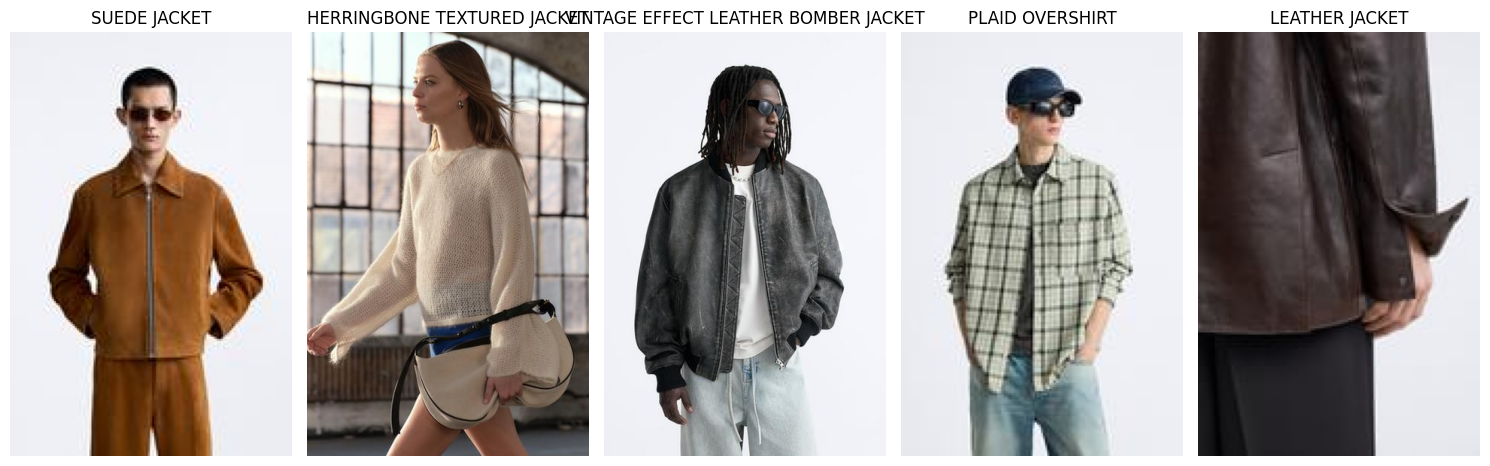

In [ ]:
main_folder = '/content/Imagens_oficial'

# Plotar as imagens
plt.figure(figsize=(15, 10))

for i, row in df_merged.iterrows():
    product_id = row['Product ID']
    product_name = row['name']

    # Caminho da imagem (considerando que cada subpasta tem imagens)
    subfolder_path = os.path.join(main_folder, str(product_id))
    if os.path.isdir(subfolder_path):
        img_name = os.listdir(subfolder_path)[0]  # Pegando a primeira imagem disponível
        img_path = os.path.join(subfolder_path, img_name)

        # Carregar a imagem
        img = mpimg.imread(img_path)

        # Adicionar subplot
        plt.subplot(1, len(df_merged), i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(product_name)

plt.tight_layout()
plt.show()


In [ ]:
#TODO - testar depois só produtos femininos ou só produtos masculinos.

Um gráfico de Pareto é uma representação visual que combina um gráfico de barras com uma linha que mostra a porcentagem acumulada. Ele é usado principalmente para identificar quais são os principais fatores que contribuem para um determinado efeito. No contexto de gestão e análise de dados, o gráfico de Pareto ajuda a concentrar esforços nos problemas ou áreas que terão o maior impacto.

### Informações fornecidas pelo gráfico de Pareto:

1. **Ordenação das Contribuições**: Os itens no gráfico são ordenados de forma decrescente com base na sua contribuição para o efeito total. No caso de um gráfico de Pareto para acumulação de AVL (Average Volume Load), os produtos serão ordenados daqueles que têm a maior AVL acumulada para os menores.

2. **Linha de Porcentagem Acumulada**: A linha mostrada geralmente representa a porcentagem acumulada do total. Isso permite identificar rapidamente qual porcentagem dos produtos ou fatores contribui para a maior parte do efeito. Por exemplo, pode-se ver que os 20% dos produtos com maior AVL acumulada contribuem com 80% do total de AVL acumulada.

3. **Identificação dos Principais Contribuintes**: O gráfico destaca visualmente os principais contribuintes para o efeito total. No caso de AVL acumulada, você pode identificar os produtos que são responsáveis pela maior parte da AVL acumulada, priorizando-os para gestão de estoque, produção, ou outras decisões estratégicas.

### Por que é chamado de gráfico de Pareto?

O gráfico de Pareto é nomeado em homenagem ao economista italiano Vilfredo Pareto, que observou que aproximadamente 80% da riqueza da Itália estava nas mãos de apenas 20% da população. Esse conceito foi generalizado para várias outras áreas, incluindo gestão de qualidade e análise de dados, onde frequentemente observa-se que uma pequena parte dos fatores contribui para a maior parte do efeito.

### Interpretação do Gráfico de Pareto:

- **Foco nos Principais Problemas**: Ajuda a identificar onde concentrar esforços para maximizar melhorias.
- **Priorização de Ações**: Permite tomar decisões informadas sobre onde alocar recursos para obter o maior impacto.
- **Visualização Clara e Impactante**: A combinação de barras e linha acumulada facilita a comunicação dos insights para stakeholders.

Portanto, ao interpretar seu gráfico de Pareto para a AVL acumulada, você poderá identificar quais produtos têm a maior contribuição para o volume total de AVL, facilitando decisões estratégicas relacionadas à gestão de estoque, produção e otimização de recursos.

In [ ]:
# Create a Plotly figure for the Pareto chart #TODO ajustar
fig = go.Figure()

# Add bars for each product ID and their accumulated AVL
fig.add_trace(go.Bar(
    x=df_merged['name'],
    y=df_merged['accumulative_avl'],
    name='Accumulative AVL'
))

# Customize the layout of the chart
fig.update_layout(
    title='Pareto Chart - Accumulative AVL',
    xaxis_title='Product ID',
    yaxis_title='Accumulative AVL',
    showlegend=False,
    width=800,
    height=600
)

# Show the Pareto chart
fig.show()


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.






---



##3. *Satisfying Procedure*: Mineração de Padrões Frequentes
<a name="sp"></a>
* Ferramenta: Algoritmos de Apriori ou FP-Growth.
* Procedimento: Extrair padrões frequentes das características dos produtos para identificar critérios mínimos comuns valorizados pelos consumidores.


Regras de associação são usadas em análise de dados para identificar relações ou padrões frequentes entre conjuntos de itens em grandes bancos de dados. A interpretação das regras de associação envolve a identificação do antecedente e do consequente, bem como a avaliação de métricas como suporte, confiança e lift. Vamos ver isso em detalhes:

### Estrutura de uma Regra de Associação
Uma regra de associação é geralmente escrita na forma:
\[ \text{Antecedente} \rightarrow \text{Consequente} \]

### Definições
- **Antecedente (ou precondição):** O conjunto de itens que aparecem juntos na base de dados antes da seta (→).
- **Consequente (ou pós-condição):** O conjunto de itens que aparecem juntos na base de dados após a seta (→).

Por exemplo, se tivermos uma regra de associação:
\[ \{leite, pão\} \rightarrow \{manteiga\} \]
isso significa que quando "leite" e "pão" são comprados juntos, há uma alta probabilidade de que "manteiga" também seja comprada.

### Métricas Importantes
1. **Suporte (Support):** Reflete a frequência com que o conjunto de itens aparece na base de dados.
\[ \text{Support}(\text{A} \rightarrow \text{C}) = \frac{\text{Transações contendo } A \cup C}{\text{Total de transações}} \]

2. **Confiança (Confidence):** Reflete a probabilidade de que o consequente apareça nas transações que contêm o antecedente.
\[ \text{Confidence}(\text{A} \rightarrow \text{C}) = \frac{\text{Transações contendo } A \cup C}{\text{Transações contendo } A} \]

3. **Lift:** Mede a força da regra em comparação com a aleatoriedade. Um lift maior que 1 indica que o antecedente e o consequente ocorrem mais frequentemente juntos do que o esperado por acaso.
\[ \text{Lift}(\text{A} \rightarrow \text{C}) = \frac{\text{Confidence}(\text{A} \rightarrow \text{C})}{\text{Support}(\text{C})} \]

### Interpretação Prática
Suponha que você está analisando transações de um supermercado e encontra a seguinte regra de associação:
\[ \{pão\} \rightarrow \{manteiga\} \]

- **Antecedente (pão):** Quando os clientes compram pão...
- **Consequente (manteiga):** ...eles frequentemente também compram manteiga.

### Exemplos

#### Exemplo 1
Regra: \[ \{leite\} \rightarrow \{biscoitos\} \]
- **Antecedente:** Leite
- **Consequente:** Biscoitos
- **Interpretação:** Se um cliente compra leite, há uma alta probabilidade de que ele também compre biscoitos.

#### Exemplo 2
Regra: \[ \{fraldas, cerveja\} \rightarrow \{chips\} \]
- **Antecedente:** Fraldas e cerveja
- **Consequente:** Chips
- **Interpretação:** Se um cliente compra fraldas e cerveja, ele também tende a comprar chips.
.

### Conclusão
A interpretação de regras de associação envolve entender o que o antecedente e o consequente representam e como métricas como suporte, confiança e lift podem ser usadas para avaliar a força e a importância dessas regras. Essas regras podem fornecer insights valiosos sobre padrões ocultos em dados transacionais, auxiliando na tomada de decisões de negócios.

In [ ]:
#@title Removendo colunas desnecessárias
col = ['Product ID','Product Category','brand','url','sku','name','description','currency','scraped_at','price','Sales Volume']
df_raw.drop(columns=col, inplace=True)
#df_raw.head()

df_encoded = pd.get_dummies(df_raw)
#df_encoded

#Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
filtered_rules = rules[rules['confidence'] >= 0.8]
filtered_rules


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(Product Position_Aisle),(section_MAN),0.384921,0.865079,0.345238,0.896907,1.036792,0.012251,1.308730,0.057694
11,(Promotion_No),(section_MAN),0.523810,0.865079,0.456349,0.871212,1.007089,0.003212,1.047619,0.014783
16,(Seasonal_No),(section_MAN),0.492063,0.865079,0.444444,0.903226,1.044096,0.018770,1.394180,0.083147
20,(terms_jackets),(section_MAN),0.555556,0.865079,0.555556,1.000000,1.155963,0.074956,inf,0.303571
22,"(terms_jackets, Product Position_Aisle)",(section_MAN),0.214286,0.865079,0.214286,1.000000,1.155963,0.028912,inf,0.171717
30,"(Seasonal_No, Promotion_No)",(section_MAN),0.257937,0.865079,0.234127,0.907692,1.049259,0.010991,1.461640,0.063265
37,"(terms_jackets, Promotion_No)",(section_MAN),0.285714,0.865079,0.285714,1.000000,1.155963,0.038549,inf,0.188889
40,"(Seasonal_No, Promotion_Yes)",(section_MAN),0.234127,0.865079,0.210317,0.898305,1.038408,0.007779,1.326720,0.048294
44,"(terms_jackets, Promotion_Yes)",(section_MAN),0.269841,0.865079,0.269841,1.000000,1.155963,0.036407,inf,0.184783
50,"(terms_jackets, Seasonal_No)",(section_MAN),0.269841,0.865079,0.269841,1.000000,1.155963,0.036407,inf,0.184783


In [ ]:
#Dividindo Homens e mulheres e remover coluna section
col = ['Product ID','Product Category','brand','url','sku','name','description','currency','scraped_at','price','Sales Volume']
df_raw.drop(columns=col, inplace=True)

df_raw_man = df_raw[df_raw['section'] == 'MAN']
df_raw_woman =  df_raw[df_raw['section'] == 'WOMAN']

df_raw_man.drop(columns = 'section', inplace=True)
df_raw_woman.drop(columns = 'section', inplace=True)

#df_raw_woman.head(5)

df_encoded_man = pd.get_dummies(df_raw_man)
df_encoded_woman = pd.get_dummies(df_raw_woman)
#df_encoded

#Apriori
frequent_itemsets_man = apriori(df_encoded_man, min_support=0.2, use_colnames=True)
rules_man = association_rules(frequent_itemsets_man, metric="lift", min_threshold=1)

frequent_itemsets_woman = apriori(df_encoded_woman, min_support=0.2, use_colnames=True)
rules_woman = association_rules(frequent_itemsets_woman, metric="lift", min_threshold=1)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [ ]:
rules_man


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Product Position_Aisle),(Promotion_No),0.399083,0.527523,0.211009,0.528736,1.002299,0.000484,1.002573,0.003817
1,(Promotion_No),(Product Position_Aisle),0.527523,0.399083,0.211009,0.400000,1.002299,0.000484,1.001529,0.004854
2,(Seasonal_Yes),(Promotion_No),0.486239,0.527523,0.256881,0.528302,1.001477,0.000379,1.001651,0.002870
3,(Promotion_No),(Seasonal_Yes),0.527523,0.486239,0.256881,0.486957,1.001477,0.000379,1.001399,0.003121
4,(Seasonal_No),(Promotion_Yes),0.513761,0.472477,0.243119,0.473214,1.001560,0.000379,1.001399,0.003204
5,(Promotion_Yes),(Seasonal_No),0.472477,0.513761,0.243119,0.514563,1.001560,0.000379,1.001651,0.002953
6,(terms_jackets),(Promotion_Yes),0.642202,0.472477,0.311927,0.485714,1.028017,0.008501,1.025739,0.076169
7,(Promotion_Yes),(terms_jackets),0.472477,0.642202,0.311927,0.660194,1.028017,0.008501,1.052949,0.051662
8,(terms_jackets),(Seasonal_Yes),0.642202,0.486239,0.330275,0.514286,1.057682,0.018012,1.057744,0.152422
9,(Seasonal_Yes),(terms_jackets),0.486239,0.642202,0.330275,0.679245,1.057682,0.018012,1.115488,0.106151


In [ ]:
rules_woman
filtered_rules = rules_woman[rules_woman['confidence'] >= 0.8]
filtered_rules


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Product Position_Aisle),(Seasonal_Yes),0.294118,0.647059,0.264706,0.9,1.390909,0.074394,3.529412,0.398148
2,(Product Position_Aisle),(terms_sweaters),0.294118,1.000000,0.294118,1.0,1.000000,0.000000,inf,0.000000
7,(Product Position_End-cap),(terms_sweaters),0.382353,1.000000,0.382353,1.0,1.000000,0.000000,inf,0.000000
8,(Product Position_Front of Store),(terms_sweaters),0.323529,1.000000,0.323529,1.0,1.000000,0.000000,inf,0.000000
13,(Promotion_No),(terms_sweaters),0.500000,1.000000,0.500000,1.0,1.000000,0.000000,inf,0.000000
17,(Promotion_Yes),(terms_sweaters),0.500000,1.000000,0.500000,1.0,1.000000,0.000000,inf,0.000000
18,(Seasonal_No),(terms_sweaters),0.352941,1.000000,0.352941,1.0,1.000000,0.000000,inf,0.000000
21,(Seasonal_Yes),(terms_sweaters),0.647059,1.000000,0.647059,1.0,1.000000,0.000000,inf,0.000000
22,"(Product Position_Aisle, terms_sweaters)",(Seasonal_Yes),0.294118,0.647059,0.264706,0.9,1.390909,0.074394,3.529412,0.398148
23,"(Product Position_Aisle, Seasonal_Yes)",(terms_sweaters),0.264706,1.000000,0.264706,1.0,1.000000,0.000000,inf,0.000000


#Relacionar os padrões frequentes com o 'Sales Volume'

In [ ]:
#@title Dataframe RAW
#TODO remove
df_raw = pd.read_csv("/content/Mestrado/Dados/zara.csv", sep=';')
df_raw.head()


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [ ]:
def evaluate_impact(rule, df, columns):
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])

    # Check if the rule's items are in the dataframe
    mask = pd.Series(True, index=df.index)
    for item in antecedents + consequents:
        if item in df.columns:
            mask &= df[item] == 1

    # Calculate the average sales volume for items satisfying the rule
    avg_sales_volume = df.loc[mask, 'Sales Volume'].mean()
    return avg_sales_volume

# Evaluate impact for each rule
for index, rule in filtered_rules.iterrows():
    impact = evaluate_impact(rule, df_encoded.join(df_raw['Sales Volume']), df_encoded.columns)
    filtered_rules.at[index, 'Sales Volume Impact'] = impact

filtered_rules


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,Sales Volume Impact
6,(Product Position_Aisle),(section_MAN),0.384921,0.865079,0.345238,0.896907,1.036792,0.012251,1.308730,0.057694,1839.517241
11,(Promotion_No),(section_MAN),0.523810,0.865079,0.456349,0.871212,1.007089,0.003212,1.047619,0.014783,1842.965217
16,(Seasonal_No),(section_MAN),0.492063,0.865079,0.444444,0.903226,1.044096,0.018770,1.394180,0.083147,1840.375000
20,(terms_jackets),(section_MAN),0.555556,0.865079,0.555556,1.000000,1.155963,0.074956,inf,0.303571,1853.342857
22,"(terms_jackets, Product Position_Aisle)",(section_MAN),0.214286,0.865079,0.214286,1.000000,1.155963,0.028912,inf,0.171717,1899.574074
30,"(Seasonal_No, Promotion_No)",(section_MAN),0.257937,0.865079,0.234127,0.907692,1.049259,0.010991,1.461640,0.063265,1881.169492
37,"(terms_jackets, Promotion_No)",(section_MAN),0.285714,0.865079,0.285714,1.000000,1.155963,0.038549,inf,0.188889,1866.888889
40,"(Seasonal_No, Promotion_Yes)",(section_MAN),0.234127,0.865079,0.210317,0.898305,1.038408,0.007779,1.326720,0.048294,1794.962264
44,"(terms_jackets, Promotion_Yes)",(section_MAN),0.269841,0.865079,0.269841,1.000000,1.155963,0.036407,inf,0.184783,1839.000000
50,"(terms_jackets, Seasonal_No)",(section_MAN),0.269841,0.865079,0.269841,1.000000,1.155963,0.036407,inf,0.184783,1825.691176


In [ ]:
df_rules = pd.DataFrame(rules)
df_rules


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Product Position_Aisle),(Promotion_No),0.384921,0.523810,0.202381,0.525773,1.003749,0.000756,1.004141,0.006072
1,(Promotion_No),(Product Position_Aisle),0.523810,0.384921,0.202381,0.386364,1.003749,0.000756,1.002352,0.007843
2,(Product Position_Aisle),(Seasonal_Yes),0.384921,0.507937,0.206349,0.536082,1.055412,0.010834,1.060670,0.085360
3,(Seasonal_Yes),(Product Position_Aisle),0.507937,0.384921,0.206349,0.406250,1.055412,0.010834,1.035923,0.106700
4,(terms_jackets),(Product Position_Aisle),0.555556,0.384921,0.214286,0.385714,1.002062,0.000441,1.001292,0.004630
5,(Product Position_Aisle),(terms_jackets),0.384921,0.555556,0.214286,0.556701,1.002062,0.000441,1.002584,0.003345
6,(Product Position_Aisle),(section_MAN),0.384921,0.865079,0.345238,0.896907,1.036792,0.012251,1.308730,0.057694
7,(section_MAN),(Product Position_Aisle),0.865079,0.384921,0.345238,0.399083,1.036792,0.012251,1.023567,0.263016
8,(Seasonal_No),(Promotion_No),0.492063,0.523810,0.257937,0.524194,1.000733,0.000189,1.000807,0.001442
9,(Promotion_No),(Seasonal_No),0.523810,0.492063,0.257937,0.492424,1.000733,0.000189,1.000711,0.001538


In [ ]:
# Join Sales Volume back to the encoded dataframe
df_with_sales = df_encoded.join(df_raw[['Sales Volume']])

# Create a function to evaluate the impact on Sales Volume
def evaluate_impact(rule, df):
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])

    # Create a mask to filter the dataframe
    mask = pd.Series(True, index=df.index)
    for item in antecedents + consequents:
        if item in df.columns:
            mask &= df[item] == 1

    # Calculate the average sales volume for items satisfying the rule
    avg_sales_volume = df.loc[mask, 'Sales Volume'].mean()
    return avg_sales_volume

# Evaluate impact for each rule
for index, rule in filtered_rules.iterrows():
    impact = evaluate_impact(rule, df_with_sales)
    filtered_rules.loc[index, 'Sales Volume Impact'] = impact

# One-hot encode the antecedents and consequents for correlation analysis
antecedents_encoded = pd.get_dummies(filtered_rules['antecedents'].apply(lambda x: list(x)).apply(pd.Series).stack()).groupby(level=0).sum()
consequents_encoded = pd.get_dummies(filtered_rules['consequents'].apply(lambda x: list(x)).apply(pd.Series).stack()).groupby(level=0).sum()

# Combine the encoded antecedents, consequents, and Sales Volume Impact
features_encoded = pd.concat([antecedents_encoded, consequents_encoded], axis=1)
features_encoded['Sales Volume Impact'] = filtered_rules['Sales Volume Impact'].values

# Calculate Pearson correlation
correlation_matrix = features_encoded.corr()

# Extract the correlation of Sales Volume Impact with the features
correlation_with_sales_impact = correlation_matrix['Sales Volume Impact'].drop('Sales Volume Impact')

print(correlation_with_sales_impact)



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Product Position_Aisle    0.310208
Promotion_No              0.274172
Promotion_Yes            -0.577485
Seasonal_No              -0.423195
Seasonal_Yes              0.320390
terms_jackets             0.372123
section_MAN                    NaN
Name: Sales Volume Impact, dtype: float64


In [ ]:
# Join Sales Volume back to the encoded dataframe
df_with_sales = df_encoded_man.join(df_raw[['Sales Volume']])

# Create a function to evaluate the impact on Sales Volume
def evaluate_impact(rule, df):
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])

    # Create a mask to filter the dataframe
    mask = pd.Series(True, index=df.index)
    for item in antecedents + consequents:
        if item in df.columns:
            mask &= df[item] == 1

    # Calculate the average sales volume for items satisfying the rule
    avg_sales_volume = df.loc[mask, 'Sales Volume'].mean()
    return avg_sales_volume

# Evaluate impact for each rule
for index, rule in filtered_rules.iterrows():
    impact = evaluate_impact(rule, df_with_sales)
    filtered_rules.loc[index, 'Sales Volume Impact'] = impact

# One-hot encode the antecedents and consequents for correlation analysis
antecedents_encoded = pd.get_dummies(filtered_rules['antecedents'].apply(lambda x: list(x)).apply(pd.Series).stack()).groupby(level=0).sum()
consequents_encoded = pd.get_dummies(filtered_rules['consequents'].apply(lambda x: list(x)).apply(pd.Series).stack()).groupby(level=0).sum()

# Combine the encoded antecedents, consequents, and Sales Volume Impact
features_encoded = pd.concat([antecedents_encoded, consequents_encoded], axis=1)
features_encoded['Sales Volume Impact'] = filtered_rules['Sales Volume Impact'].values

# Calculate Pearson correlation
correlation_matrix = features_encoded.corr()

# Extract the correlation of Sales Volume Impact with the features
correlation_with_sales_impact = correlation_matrix['Sales Volume Impact'].drop('Sales Volume Impact')

print(correlation_with_sales_impact)



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Product Position_Aisle            -0.330559
Product Position_End-cap           0.577659
Product Position_Front of Store   -0.742527
Promotion_No                       0.086459
Promotion_Yes                      0.236689
Seasonal_No                             NaN
Seasonal_Yes                       0.250328
terms_sweaters                    -0.184330
Seasonal_Yes                      -0.154622
terms_sweaters                     0.045648
Name: Sales Volume Impact, dtype: float64


In [ ]:
# Join Sales Volume back to the encoded dataframe
df_with_sales = df_encoded_woman.join(df_raw[['Sales Volume']])

# Create a function to evaluate the impact on Sales Volume
def evaluate_impact(rule, df):
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])

    # Create a mask to filter the dataframe
    mask = pd.Series(True, index=df.index)
    for item in antecedents + consequents:
        if item in df.columns:
            mask &= df[item] == 1

    # Calculate the average sales volume for items satisfying the rule
    avg_sales_volume = df.loc[mask, 'Sales Volume'].mean()
    return avg_sales_volume

# Evaluate impact for each rule
for index, rule in filtered_rules.iterrows():
    impact = evaluate_impact(rule, df_with_sales)
    filtered_rules.loc[index, 'Sales Volume Impact'] = impact

# One-hot encode the antecedents and consequents for correlation analysis
antecedents_encoded = pd.get_dummies(filtered_rules['antecedents'].apply(lambda x: list(x)).apply(pd.Series).stack()).groupby(level=0).sum()
consequents_encoded = pd.get_dummies(filtered_rules['consequents'].apply(lambda x: list(x)).apply(pd.Series).stack()).groupby(level=0).sum()

# Combine the encoded antecedents, consequents, and Sales Volume Impact
features_encoded = pd.concat([antecedents_encoded, consequents_encoded], axis=1)
features_encoded['Sales Volume Impact'] = filtered_rules['Sales Volume Impact'].values

# Calculate Pearson correlation
correlation_matrix = features_encoded.corr()

# Extract the correlation of Sales Volume Impact with the features
correlation_with_sales_impact = correlation_matrix['Sales Volume Impact'].drop('Sales Volume Impact')

print(correlation_with_sales_impact)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Product Position_Aisle            -0.580341
Product Position_End-cap           0.443557
Product Position_Front of Store    0.221447
Promotion_No                      -0.310754
Promotion_Yes                      0.721496
Seasonal_No                       -0.297738
Seasonal_Yes                       0.297303
terms_sweaters                    -0.219356
Seasonal_Yes                      -0.410377
terms_sweaters                     0.321926
Name: Sales Volume Impact, dtype: float64


https://blog.proffernandamaciel.com.br/assimetria-e-curtose-dos-dados/

https://stackoverflow.com/questions/65439843/linear-regression-get-feature-importance-using-minmaxscaler-extremely-larg

https://www.researchgate.net/figure/Relative-importance-of-each-variables-in-linear-regression-model-Relative-importance-of_fig2_352566660

https://stackoverflow.com/questions/61088029/how-to-calculate-which-independant-variable-influences-dependant-variable-the-mo

https://www.napratica.org.br/diagrama-de-pareto/



---

